## 1. 下載Fashion MNIST datasets
本資料集為包含10個種類的服飾正面灰階圖片(28 x 28); 訓練集共60000張, 測試集共10000張

其中標籤編號對應如下：

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

print("train_image: ", train_image.shape)
print("train_label: ", train_label.shape)
print("test_image: ", test_image.shape)
print("test_label: ", test_label.shape)

train_image:  (60000, 28, 28)
train_label:  (60000,)
test_image:  (10000, 28, 28)
test_label:  (10000,)


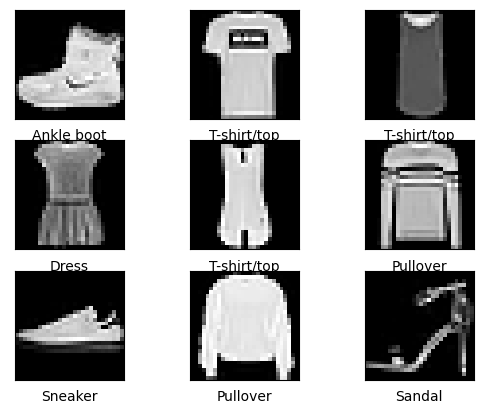

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def ShowImage(x, y):
    for i in range(9):
        plt.subplot(330 + i + 1)
        plt.imshow(x[i], cmap=plt.get_cmap('gray'))
        # plt.xticks() 把x坐標軸改為自定義座標名稱
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(class_names[y[i]])
    plt.show()
    
ShowImage(train_image, train_label)

## 2. 資料前處理及建立模型

In [10]:
# 對資料做前處理, 將資料正規化到 0~1 之間
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    y = tf.cast(y, dtype=tf.int32)
    return x, y

# 建立模型
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    return model

model = build_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


## 3. 編譯與訓練模型

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

train_images, train_labels = preprocess(train_image, train_label)

batchsize = 128
history = model.fit(train_images, train_labels, epochs=100, 
                    batch_size=batchsize, 
                    validation_split=0.2, 
                    verbose=2)

Epoch 1/100
375/375 - 1s - loss: 0.5411 - accuracy: 0.8112 - val_loss: 0.4037 - val_accuracy: 0.8533
Epoch 2/100
375/375 - 1s - loss: 0.3792 - accuracy: 0.8628 - val_loss: 0.3542 - val_accuracy: 0.8753
Epoch 3/100
375/375 - 1s - loss: 0.3379 - accuracy: 0.8774 - val_loss: 0.3580 - val_accuracy: 0.8714
Epoch 4/100
375/375 - 1s - loss: 0.3129 - accuracy: 0.8846 - val_loss: 0.3389 - val_accuracy: 0.8754
Epoch 5/100
375/375 - 1s - loss: 0.2925 - accuracy: 0.8923 - val_loss: 0.3385 - val_accuracy: 0.8802
Epoch 6/100
375/375 - 1s - loss: 0.2764 - accuracy: 0.8974 - val_loss: 0.3285 - val_accuracy: 0.8821
Epoch 7/100
375/375 - 1s - loss: 0.2640 - accuracy: 0.9022 - val_loss: 0.3199 - val_accuracy: 0.8872
Epoch 8/100
375/375 - 1s - loss: 0.2533 - accuracy: 0.9049 - val_loss: 0.3050 - val_accuracy: 0.8892
Epoch 9/100
375/375 - 1s - loss: 0.2416 - accuracy: 0.9086 - val_loss: 0.3148 - val_accuracy: 0.8888
Epoch 10/100
375/375 - 1s - loss: 0.2310 - accuracy: 0.9128 - val_loss: 0.4014 - val_accura

Epoch 82/100
375/375 - 1s - loss: 0.0376 - accuracy: 0.9865 - val_loss: 0.7144 - val_accuracy: 0.8935
Epoch 83/100
375/375 - 1s - loss: 0.0420 - accuracy: 0.9843 - val_loss: 0.7484 - val_accuracy: 0.8929
Epoch 84/100
375/375 - 1s - loss: 0.0363 - accuracy: 0.9867 - val_loss: 0.7175 - val_accuracy: 0.8913
Epoch 85/100
375/375 - 1s - loss: 0.0412 - accuracy: 0.9853 - val_loss: 0.7396 - val_accuracy: 0.8920
Epoch 86/100
375/375 - 1s - loss: 0.0351 - accuracy: 0.9873 - val_loss: 0.7569 - val_accuracy: 0.8938
Epoch 87/100
375/375 - 1s - loss: 0.0346 - accuracy: 0.9876 - val_loss: 0.7643 - val_accuracy: 0.8938
Epoch 88/100
375/375 - 1s - loss: 0.0329 - accuracy: 0.9874 - val_loss: 0.7671 - val_accuracy: 0.8947
Epoch 89/100
375/375 - 1s - loss: 0.0434 - accuracy: 0.9839 - val_loss: 0.7832 - val_accuracy: 0.8919
Epoch 90/100
375/375 - 1s - loss: 0.0339 - accuracy: 0.9885 - val_loss: 0.7576 - val_accuracy: 0.8949
Epoch 91/100
375/375 - 1s - loss: 0.0358 - accuracy: 0.9872 - val_loss: 0.7258 - v

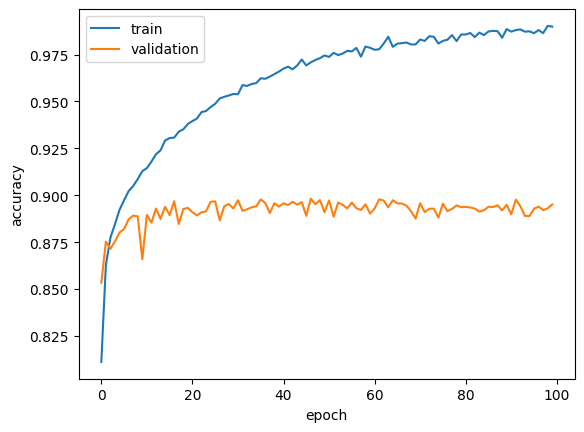

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 4.保存模型
1. 保存網路模型與權重參數; 使用model.save(filepath)將Keras模型和權重保存在HDF5文件中, 該文件包含模型的結構、權重、訓練配置(損失函數、優化器等)、優化器的狀態
2. 保存網路模型與權重參數到指定資料夾中; 使用tf.saved_model.save(network, path), 此儲存方式會建立三種檔案及資料夾 (一) assets 資料夾: TF graph會用到的檔案 (二) variables資料夾: 參數權重, 包含了所有模型的變量(tf.Variable objects)參數 (三) saved_model.pd 檔案: 保存MetaGraph的網路結構
3. 儲存權重; 使用save_weights()

### 方法一: 保存網路模型與權重參數至HDF5檔案

In [6]:
# 儲存模型
model.save('Fashion_mnist_model.h5')
print('Model saved')
del model

# 載入模型
print('loaded model from Fashion_mnist_model.h5')
test_images, test_labels = preprocess(test_image, test_label)
Model2 = tf.keras.models.load_model('Fashion_mnist_model.h5', compile=False)

# 拿前10筆資料來預測並印出標籤, 只用於預測時不需要再次對模型進行編譯(使用訓練好的參數與網路, 不須再使用loss function和optimizer)
prediction = Model2.predict(test_images[:10])
print(prediction)
print('-' * 50)
print(tf.argmax(prediction, 1))
print(test_labels[:10])

Model saved
loaded model from Fashion_mnist_model.h5
[[2.5353489e-12 1.5561668e-08 9.1913729e-18 5.2378822e-12 7.4324141e-12
  8.2157621e-06 9.4111334e-07 4.7994240e-06 5.5173688e-10 9.9998605e-01]
 [8.4478709e-12 3.0799480e-14 9.9999988e-01 4.7384807e-09 1.2531662e-08
  5.9076896e-18 5.1724793e-08 2.1468194e-17 3.0047756e-18 1.9572725e-20]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3947329e-37 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 8.9557006e-32 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.9957854e-01 2.2392298e-10 1.3383135e-08 5.5847783e-12 9.3049585e-14
  3.5480983e-17 4.2151040e-04 5.3938413e-17 3.0886311e-14 7.2868928e-17]
 [2.7997627e-35 1.0000000e+00 0.0000000e+00 1.4190824e-29 0.0000000e+00
  0.0000000e+00 2.0128582e-35 0.0000000e+00 7.1077368e-33 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 6.3161104e-26 4.0489396e-33 1.0000000e+00
  2.5

In [7]:
# 載入模型
print('loaded model from Fashion_mnist_model.h5')
test_images, test_labels = preprocess(test_image, test_label)
Model2 = tf.keras.models.load_model('Fashion_mnist_model.h5', compile=False)

# 若要做評估則需要再編譯一次模型檔
Model2.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
loss, accuracy = Model2.evaluate(test_images, test_labels)
print("\n test loss:", loss)
print("\n test accuracy:", accuracy)

loaded model from Fashion_mnist_model.h5
313/313 [==============================] - 1s 3ms/step - loss: 0.8312 - accuracy: 0.8936

 test loss: 0.8311949968338013

 test accuracy: 0.8935999870300293


### 方法二: 保存網路模型與權重參數至指定資料夾

In [14]:
# 儲存網路至指定資料夾
tf.saved_model.save(model, 'temp')
print('Model saved')
del model

test_images, test_labels = preprocess(test_image, test_label)

print('Load Model')
Model2 = tf.saved_model.load('temp')
categorical_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# 輸入測試資料
y_pred = Model2(test_images)
# 利用update_state() 設定更新真實值與預測值的數據
categorical_accuracy.update_state(y_true=test_labels, y_pred=y_pred)
print('Test Accuracy:', categorical_accuracy.result())


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: temp\assets
Model saved
Load Model
Test Accuracy: tf.Tensor(0.8907, shape=(), dtype=float32)


### 方法三: 僅保存權重(應用於已有網路結構檔案的情況下)

In [22]:
# 儲存權重檔
model.save_weights('Fashion_mnist_weights.h5')
print('Model weights saved')


newModel = build_model()
newModel.load_weights('Fashion_mnist_weights.h5')
print('Load Model weights')

newModel.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

test_images, test_labels = preprocess(test_image, test_label)


loss, accuracy = newModel.evaluate(test_images, test_labels)
print("\n test loss:", loss)
print("\n test accuracy:", accuracy)

Model weights saved
Load Model weights
313/313 [==============================] - 1s 3ms/step - loss: 0.9093 - accuracy: 0.8907

 test loss: 0.9092891812324524

 test accuracy: 0.8906999826431274
